<a href="https://colab.research.google.com/github/AntonioWanderer/CompPhys22/blob/main/EnergyRoot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math as m
import matplotlib.pyplot as plt

In [2]:
a=5
u=10
prec=10e-7
c=2*a**2*u

In [3]:
def Func(x):
    f=1/m.tan(m.sqrt(c*(1-x)))-m.sqrt(1/x-1)
    return f
    
def Func1(x):
    f=Func(x)+x#1/(1/m.tan(m.sqrt(c*(1-x)))**2 + 1)#1-1/c*(m.atan((x/(1-x))**0.5))**2#
    return f

def Fder(x):
    f=(1+1/(m.tan(m.sqrt(c*(1-x))))**2)*c/(2*m.sqrt(c*(1-x)))+1/(2*x**2*m.sqrt(1/x-1))
    return f

In [4]:
x=1-(m.pi)**2/c
if x<0:
    x=0
#print(x)

Dichotomy energy root:  -9.954784997540175 // 14  steps


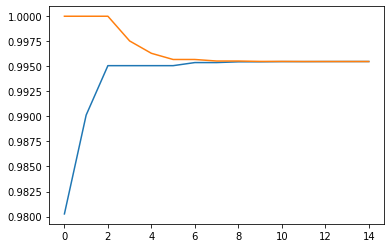

In [5]:
i=0
l1=[x+prec]
l2=[1-prec]
f1=Func(l1[-1])
f2=Func(l2[-1])
while l2[-1]-l1[-1]>2*prec:
    i=i+1
    l3=(l1[-1]+l2[-1])/2
    f3=Func(l3)
    if f1*f3<0:
        l2.append(l3)
        l1.append(l1[-1])
        f2=f3
    else:
        l1.append(l3)
        l2.append(l2[-1])
        f1=f3
    #print(l1, l2)
l1res=-l1[-1]*u
l2res=-l2[-1]*u
print("Dichotomy energy root: ", (l1res + l2res)/2,"//", i," steps")
plt.plot(l1)
plt.plot(l2)
plt.show()

Newton's energy root:  -9.954789352376942 // 5  steps


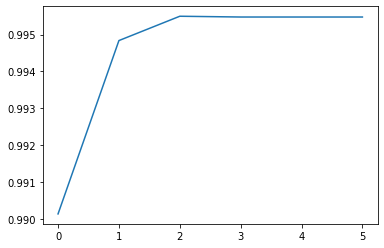

In [6]:
i=0
result = []
z=x+prec
t=(x+1)/2
result.append(t)
while abs(Func(t)-Func(z))>=prec:
    i=i+1
    z=t
    t=z-Func(z)/Fder(z)
    result.append(t)
    #print(t)
z=-z*u
t=-t*u
print("Newton's energy root: ", t,"//", i," steps")
plt.plot(result)
plt.show()

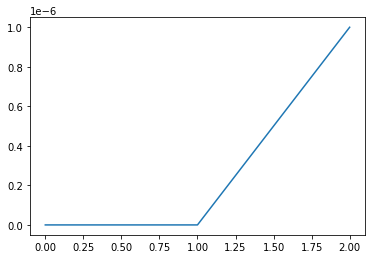

Iterations energy root:  -9.999999999999999e-06 // 1  steps


In [7]:
i=0
result = [0,0]
t=prec
result.append(t)
while True:
    i=i+1
    if (result[-1]-result[-2])**2/abs(2*result[-2]-result[-1]-result[-3])<=prec:
    #if i == 10:
    	break
    z=t
    print(t)
    t=Func1(z)
    result.append(t)
    #print(t)
z=-z*u
t=-t*u
plt.plot(result)
plt.show()
print("Iterations energy root: ", t,"//", i," steps")